In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [67]:
data = pd.read_csv("Iris.csv")
data.corr()

,PetalLengthCm,PetalWidthCm,SepalLengthCm,SepalWidthCm,Species
PetalLengthCm,1.000000,0.961883,0.871305,-0.421057,0.948339
PetalWidthCm,0.961883,1.000000,0.817058,-0.356376,0.955693
SepalLengthCm,0.871305,0.817058,1.000000,-0.109321,0.782904
SepalWidthCm,-0.421057,-0.356376,-0.109321,1.000000,-0.418348
Species,0.948339,0.955693,0.782904,-0.418348,1.000000


C:\Users\Mohammed Tlemsani\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Mohammed Tlemsani\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Mohammed Tlemsani\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this war

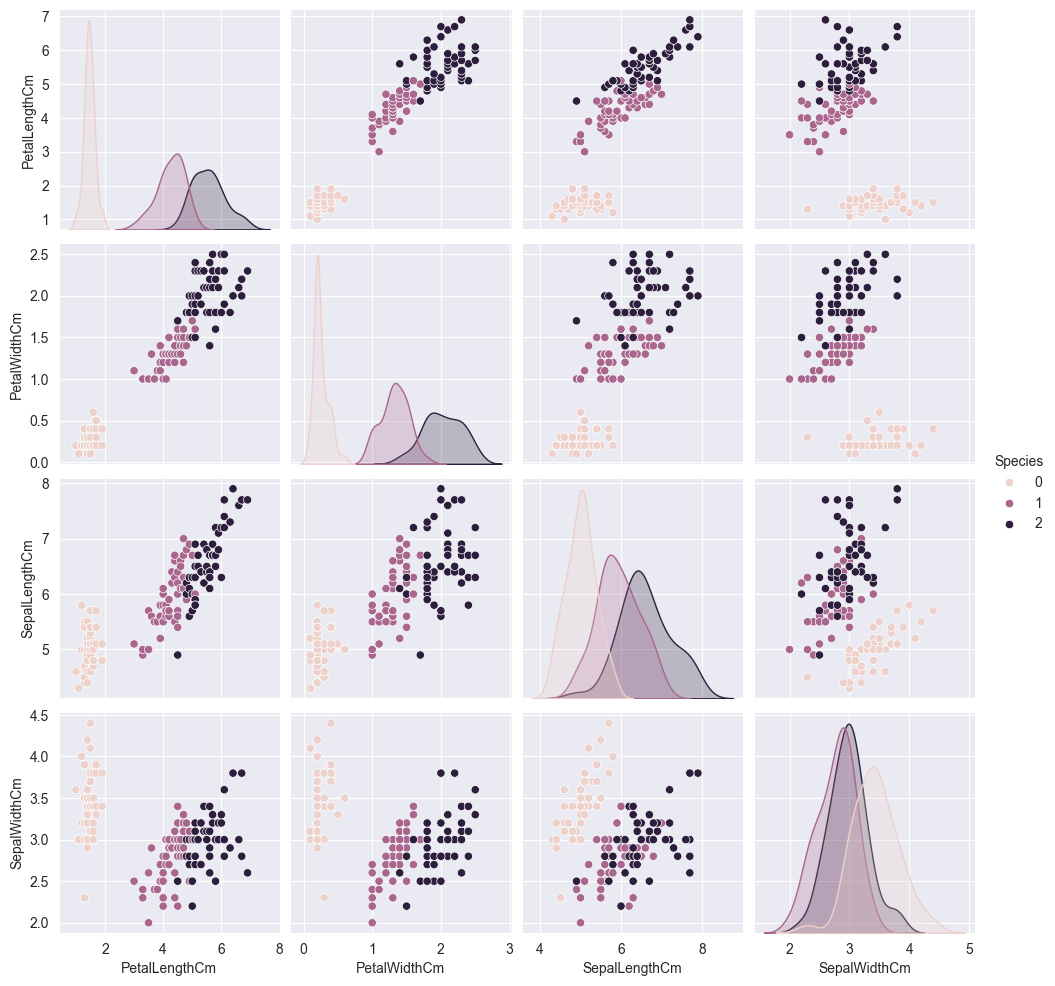

In [68]:
sns.pairplot(data=data, hue="Species")

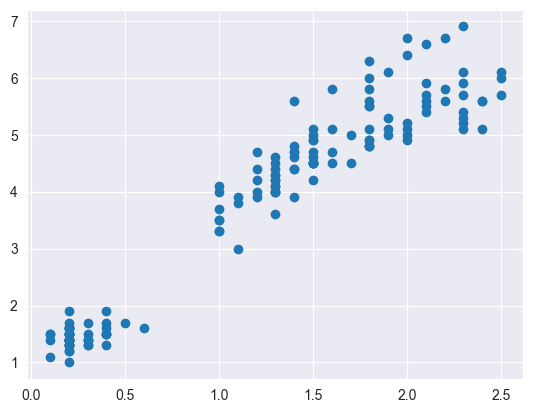

In [69]:
plt.scatter(data["PetalWidthCm"], data["PetalLengthCm"])
plt.show()


In [70]:
x = data.PetalWidthCm.values.reshape(147,1)
y = data.PetalLengthCm.values.reshape(147,1)
print(x.shape,y.shape)

(147, 1) (147, 1)


In [71]:
x = np.hstack((x,np.ones((147,1))))
print(x)

[[0.2 1. ]
 [0.1 1. ]
 [0.2 1. ]
 [0.2 1. ]
 [0.2 1. ]
 [0.2 1. ]
 [0.2 1. ]
 [0.2 1. ]
 [0.3 1. ]
 [0.3 1. ]
 [0.4 1. ]
 [0.1 1. ]
 [0.2 1. ]
 [0.2 1. ]
 [0.2 1. ]
 [0.2 1. ]
 [0.2 1. ]
 [0.2 1. ]
 [0.2 1. ]
 [0.2 1. ]
 [0.3 1. ]
 [0.3 1. ]
 [0.3 1. ]
 [0.1 1. ]
 [0.1 1. ]
 [0.2 1. ]
 [0.2 1. ]
 [0.2 1. ]
 [0.2 1. ]
 [0.2 1. ]
 [0.2 1. ]
 [0.3 1. ]
 [0.4 1. ]
 [0.4 1. ]
 [0.4 1. ]
 [0.2 1. ]
 [0.2 1. ]
 [0.2 1. ]
 [0.2 1. ]
 [0.2 1. ]
 [0.4 1. ]
 [0.6 1. ]
 [0.2 1. ]
 [0.3 1. ]
 [0.4 1. ]
 [0.5 1. ]
 [0.2 1. ]
 [0.4 1. ]
 [1.1 1. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [1.  1. ]
 [1.3 1. ]
 [1.  1. ]
 [1.1 1. ]
 [1.1 1. ]
 [1.2 1. ]
 [1.4 1. ]
 [1.  1. ]
 [1.2 1. ]
 [1.3 1. ]
 [1.3 1. ]
 [1.3 1. ]
 [1.  1. ]
 [1.3 1. ]
 [1.3 1. ]
 [1.2 1. ]
 [1.3 1. ]
 [1.3 1. ]
 [1.5 1. ]
 [1.3 1. ]
 [1.3 1. ]
 [1.2 1. ]
 [1.3 1. ]
 [1.4 1. ]
 [1.4 1. ]
 [1.3 1. ]
 [1.5 1. ]
 [1.5 1. ]
 [1.5 1. ]
 [1.5 1. ]
 [1.5 1. ]
 [1.6 1. ]
 [1.7 1. ]
 [1.3 1. ]
 [1.4 1. ]
 [1.5 1. ]
 [1.2 1. ]
 [1.4 1. ]
 [1.4 1. ]

In [72]:
np.random.seed(0)
theta = np.random.randn(2,1)
print(theta)

[[1.76405235]
 [0.40015721]]


In [73]:
def model(x,theta) :
    return x.dot(theta)

In [74]:
def costFunction(x,y,theta) :
    m = len(y)
    return 1/(2*m) * np.sum((model(x,theta) - y)**2) 

In [75]:
costFunction(x,y,theta)

0.9558641039019269

In [76]:
def gradientFunction(x,y,theta) :
    m = len(y)
    return 1/(m) * x.T.dot((model(x,theta)-y))

In [77]:
def gradientDescent(x,y,theta,learningRate,iter) :
    cost_history = np.zeros(iter)
    for i in range(iter):
        theta = theta - learningRate*gradientFunction(x,y,theta)
        cost_history[i] = costFunction(x,y,theta)
    return theta, cost_history

In [78]:
n_iterations = 10000
learning_rate = 0.04
theta_final , cost_history = gradientDescent(x,y,theta,learning_rate,n_iterations)

In [79]:
theta_final
cost_history[-1]

0.11491760196355781

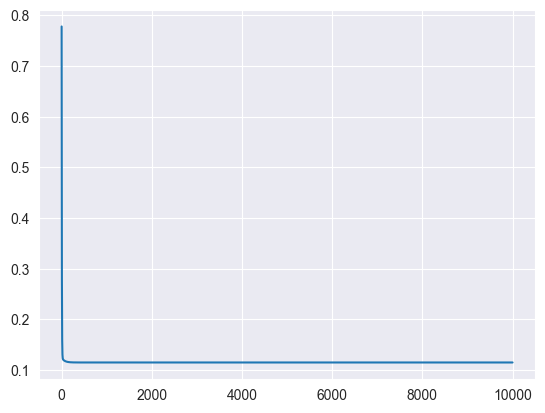

In [80]:
plt.plot(cost_history)
plt.show()

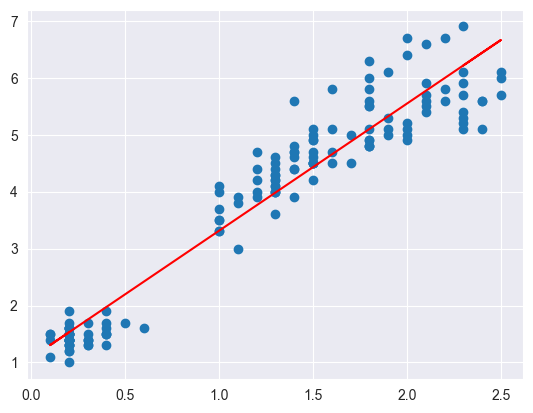

In [81]:
prediction = model(x,theta_final)
plt.scatter(data["PetalWidthCm"],data["PetalLengthCm"])
plt.plot(data["PetalWidthCm"],prediction,color = "red")
plt.show()

In [82]:
print(x.shape,y.shape)

(147, 2) (147, 1)


In [83]:
def coef_determination(y, pred) :
    u = ((y-pred)**2).sum()
    v = ((y-y.mean())**2).sum()
    return 1 - u/v

In [84]:
coef = coef_determination(y,prediction)

In [85]:
coef

0.9252184280244504